# Prediction on bigger flight (Raster) with New Full Model

In [1]:
#hide

from osgeo import gdal

from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
import numpy as np
from matplotlib import colors

import matplotlib.pyplot as plt
import warnings
import pandas as d
warnings.filterwarnings("ignore")

def scaleMinMax(x):
    return((x-np.nanmin(x))/(np.nanmax(x)-np.nanmin(x)))

def scaleCCC(x):
    return((x- np.nanpercentile(x,0))/(np.nanpercentile(x,98)-np.nanpercentile(x,0)))



AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

In [ ]:
lowtif = gdal.Open('../Data/img/Belon_1004_MS.tif')

In [ ]:
gt = lowtif.GetGeoTransform()
proj = lowtif.GetProjection()
gt
proj

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [ ]:
### 65535 is given for NA (outside of Drone flight)

Reflectance_444 = lowtif.GetRasterBand(1).ReadAsArray().astype('float')
Reflectance_475 = lowtif.GetRasterBand(2).ReadAsArray().astype('float')
Reflectance_531 = lowtif.GetRasterBand(3).ReadAsArray().astype('float')
Reflectance_560 = lowtif.GetRasterBand(4).ReadAsArray().astype('float')
Reflectance_650 = lowtif.GetRasterBand(5).ReadAsArray().astype('float')
Reflectance_668 = lowtif.GetRasterBand(6).ReadAsArray().astype('float')
Reflectance_705 = lowtif.GetRasterBand(7).ReadAsArray().astype('float')
Reflectance_717 = lowtif.GetRasterBand(8).ReadAsArray().astype('float')
Reflectance_740 = lowtif.GetRasterBand(9).ReadAsArray().astype('float')
Reflectance_842 = lowtif.GetRasterBand(10).ReadAsArray().astype('float')

Reflectance_444[Reflectance_444 == 65535] = np.NAN
Reflectance_475[Reflectance_475 == 65535] = np.NAN
Reflectance_531[Reflectance_531 == 65535] = np.NAN
Reflectance_560[Reflectance_560 == 65535] = np.NAN
Reflectance_650[Reflectance_650 == 65535] = np.NAN
Reflectance_668[Reflectance_668 == 65535] = np.NAN
Reflectance_705[Reflectance_705 == 65535] = np.NAN
Reflectance_717[Reflectance_717 == 65535] = np.NAN
Reflectance_740[Reflectance_740 == 65535] = np.NAN
Reflectance_842[Reflectance_842 == 65535] = np.NAN

Reflectance_444[Reflectance_444 == 0] = np.NAN
Reflectance_475[Reflectance_475 == 0] = np.NAN
Reflectance_531[Reflectance_531 == 0] = np.NAN
Reflectance_560[Reflectance_560 == 0] = np.NAN
Reflectance_650[Reflectance_650 == 0] = np.NAN
Reflectance_668[Reflectance_668 == 0] = np.NAN
Reflectance_705[Reflectance_705 == 0] = np.NAN
Reflectance_717[Reflectance_717 == 0] = np.NAN
Reflectance_740[Reflectance_740 == 0] = np.NAN
Reflectance_842[Reflectance_842 == 0] = np.NAN

Full = np.dstack((Reflectance_444,Reflectance_475,Reflectance_531,Reflectance_560,Reflectance_650,
                   Reflectance_668,Reflectance_705,Reflectance_717,Reflectance_740,Reflectance_842))



Full.shape


(8489, 15179, 10)

In [ ]:
FullStan=np.apply_along_axis(scaleMinMax, 2, Full)

In [ ]:
Full_ten = torch.from_numpy(Full)
FullStan_ten =torch.from_numpy(FullStan)

In [ ]:
NDVI=(Full_ten[:,:,9]-Full_ten[:,:,5])/(Full_ten[:,:,9]+Full_ten[:,:,5])

In [ ]:
NDVI=NDVI[:,:,None]

In [ ]:
NDVI_Stan=(FullStan_ten[:,:,9]-FullStan_ten[:,:,5])/(FullStan_ten[:,:,9]+FullStan_ten[:,:,5])

In [ ]:
NDVI_Stan=NDVI_Stan[:,:,None]

In [ ]:
FullCombo_ten=torch.cat((Full_ten,FullStan_ten,NDVI,NDVI_Stan),2)

In [ ]:
r = scaleCCC(Reflectance_650)
g = scaleCCC(Reflectance_531)
b = scaleCCC(Reflectance_444)


rgb = np.dstack((r,g,b))

In [ ]:
Reflectance_444= None
Reflectance_475= None
Reflectance_531= None
Reflectance_560= None
Reflectance_650= None
Reflectance_668= None
Reflectance_705= None
Reflectance_717= None
Reflectance_740= None
Reflectance_842= None

# B1= None
# B2= None
# B3= None
# B4= None
# B5= None
# B6= None
# B7= None
# B8= None
# B9= None
# B10= None

r= None
g= None
b= None
# Full= None
FullStan= None

In [ ]:
# torch.save(FullCombo_ten,"D:\Git_repo\Drone_NN_Classifier\Output\FullCombo_Site1_High.pt")

In [ ]:
# FullCombo_ten=torch.load("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/FullCombo_Site1_High.pt")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


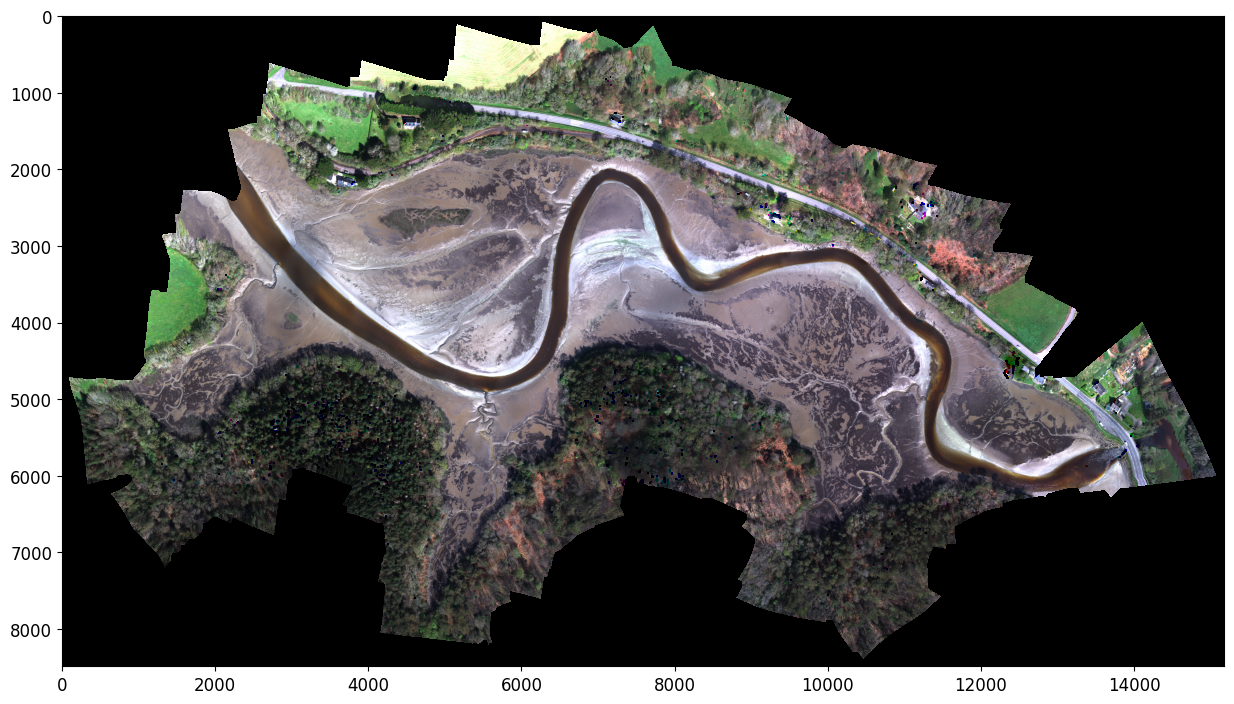

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(rgb)
plt.show()

In [ ]:
import pathlib


def load_posix_learner(path):
    save = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
    
    learn = load_learner(path)
    
    pathlib.PosixPath = save
    return learn

In [ ]:
learn = load_learner('../models/DISCOV_BiCOME.pkl')
# learn = load_learner('D:\Git_repo\Drone_NN_Classifier\models\Model_Bede.pkl')

In [ ]:
categories = learn.dls.vocab

In [ ]:
categories

['Bare_Sediment', 'Clorophyta', 'Deep_Sediment', 'Low_SPC', 'MPB', 'Magnoliosida', 'Phaeophyta', 'Rhodphyta', 'SunGlint', 'Water']

In [ ]:
Columns_test=['Reflectance_444',
              'Reflectance_475',
              'Reflectance_531',
              'Reflectance_560',
              'Reflectance_650',
              'Reflectance_668',
              'Reflectance_705',
              'Reflectance_717',
              'Reflectance_740',
              'Reflectance_842',
              'Reflectance_Stan_444',
              'Reflectance_Stan_475',
              'Reflectance_Stan_531',
              'Reflectance_Stan_560',
              'Reflectance_Stan_650',
              'Reflectance_Stan_668',
              'Reflectance_Stan_705',
              'Reflectance_Stan_717',
              'Reflectance_Stan_740',
              'Reflectance_Stan_842',
              'NDVI',
              'NDVI_Stan']


In [ ]:
v = FullCombo_ten.view(FullCombo_ten.shape[0]*FullCombo_ten.shape[1],FullCombo_ten.shape[2])

In [ ]:
# torch.save(v,"/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/FullCombo_Long_Site1_High.pt")

In [ ]:
# v=torch.load("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/FullCombo_Long_Site1_High.pt")

In [ ]:
v.shape

torch.Size([128854531, 22])

In [ ]:
df_test_nan=pd.DataFrame(v,columns=Columns_test)
df_test_nan_nrum = df_test_nan

In [ ]:
# df_test_nan.to_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_nan_Site1_High.parquet")

In [ ]:
# df_test_nan_nrum.to_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_nan_nrum_Site1_High.parquet")

In [ ]:
# df_test_nan=pd.read_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_nan_Site1_High.parquet")
# df_test_nan_nrum=pd.read_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_nan_nrum_Site1_High.parquet")

In [ ]:
df_test = df_test_nan.dropna()

In [ ]:
# df_test.to_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_Site1_High.parquet")

In [ ]:
df_test_nan_nrum['ID'] = np.arange(len(df_test_nan_nrum))
df_test_nrum = df_test_nan_nrum.dropna()

In [ ]:
# df_test_nrum.to_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_nrum_Site1_High.parquet")

In [ ]:
df_test.shape

(73670030, 22)

In [ ]:
ID_l=list(df_test_nrum['ID'])

In [ ]:
# np.save('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/ID_list_Site1_High.npy',ID_l)

In [ ]:
# df_test=pd.read_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_Site1_High.parquet")

In [ ]:
dl = learn.dls.test_dl(df_test, bs=4000)
preds,_ = learn.get_preds(dl=dl)

In [ ]:
# np.save('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/Preds_Site1_High.npy',preds)

In [ ]:
# preds = np.load('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/Preds_Site1_High.npy').reshape(159664240,11) #131028429 = df_test.shape[0]

In [ ]:
# greenAlgae_Probs=preds[:,1]

In [ ]:
class_idxs = preds.argmax(axis=1)
# res = [learn.dls.vocab[c] for c in class_idxs]

In [ ]:
# np.save('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/class_idxs_Site1_High.npy',class_idxs)
# np.save('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/res_Site1_High.npy',res)

In [ ]:
# class_idxs = np.load('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/class_idxs_Site1_High.npy')
# res = np.load('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/res_Site1_High.npy')

In [ ]:
class_probs= preds.max(axis=1)

In [ ]:
class_probs=class_probs.values

In [ ]:
# np.save('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/class_probs_Site1_High.npy',class_probs)

In [ ]:
# class_probs = np.load('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/class_probs_Site1_High.npy')

# Prediction Plot 

In [ ]:
type(class_idxs.tolist())

In [ ]:
NumPred= class_idxs.tolist()
PredProbs =class_probs.tolist()

In [ ]:
# ID_l = np.load('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/ID_list_Site1_High.npy')

In [ ]:
# res_df= pd.DataFrame(list(zip(res,NumPred, ID_l,PredProbs)),columns =['Pred_Class','Pred_ID','ID','Prob'])
res_df= pd.DataFrame(list(zip(NumPred, ID_l,PredProbs)),columns =['Pred_ID','ID','Prob'])

In [ ]:
res_df

In [ ]:
# res_df.to_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/res_df_Site1_High.parquet")

In [ ]:
res_df['Pred_ID'].value_counts()

In [ ]:
res_df['Pred_Class'].value_counts()

In [ ]:
# res_df= pd.read_parquet('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/res_df_Site1_High.parquet')

In [ ]:
# df_test_nan= pd.read_parquet('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/df_test_nan_Site1_High.parquet')

In [ ]:
df_test_nan['ID']= np.arange(len(df_test_nan))

In [ ]:
res_input_df = pd.merge(df_test_nan,res_df, how='left', on = 'ID')

In [ ]:
res_input_df

In [ ]:
# res_input_df.to_parquet("/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/res_input_df_Site1_High.parquet")

In [ ]:
# res_input_df=pd.read_parquet('/Users/bfrd/Research/BigData/Nantes/Drone_Classification/Output/res_input_df_Site1_High.parquet')

In [ ]:
# res_input_df['Pred_Class'] = np.where((res_input_df['Pred_Class']=='Phaeophyta') & (res_input_df['NDVI']<0.15), 'Water', res_input_df['Pred_Class'])

In [ ]:
res_input_df['Pred_ID'] = np.where((res_input_df['Pred_ID']==6) & (res_input_df['NDVI']<0.15), 9, res_input_df['Pred_ID'])

In [ ]:
# res_input_df['Pred_Class'] = np.where((res_input_df['Pred_Class']=='Low_SPC') & (res_input_df['NDVI']>0.2), 'Magnoliosida', res_input_df['Pred_Class'])
res_input_df['Pred_ID'] = np.where((res_input_df['Pred_ID']==3) & (res_input_df['NDVI']>0.2), 5, res_input_df['Pred_ID'])
# res_input_df['Pred_Class'] = np.where((res_input_df['Pred_Class']=='Low_SPC') & (res_input_df['NDVI']<=0.2), 'Bare_Sediment', res_input_df['Pred_Class'])
res_input_df['Pred_ID'] = np.where((res_input_df['Pred_ID']==3) & (res_input_df['NDVI']<=0.2), 0, res_input_df['Pred_ID'])

In [ ]:
# Check it has actually worked
res_input_df_Nan= res_input_df.dropna()


In [ ]:
Pred_arr = np.asarray(res_input_df['Pred_ID'])

In [ ]:
Pred_arr=Pred_arr+1

In [ ]:
Full.shape

(10567, 9571, 10)

In [ ]:
Prob_arr = np.asarray(res_input_df['Prob'])
Prob_ras = Prob_arr.reshape(Full.shape[0], Full.shape[1])

In [ ]:
Pred_ras = Pred_arr.reshape(Full.shape[0], Full.shape[1])

In [ ]:
Chloro_ras = np.where(Pred_ras==2, 1, 0)

In [ ]:
Zost_ras=np.where(Pred_ras==6, 1, 0)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,15))
# find minimum of minima & maximum of maxima
minmin = np.min([np.min(Chloro_ras), np.min(Zost_ras)])
maxmax = np.max([np.max(Chloro_ras), np.max(Zost_ras)])

im1 = axes[0].imshow(Chloro_ras, vmin=minmin, vmax=maxmax)
im2 = axes[1].imshow(Zost_ras, vmin=minmin, vmax=maxmax)
plt.show()

In [ ]:
categories

In [ ]:
cmap = colors.ListedColormap(["#FFFFFF","#70543e","#b3ff1a","#389317","#000000","#DAA520","#389318","#873e23","#b3002d","#42c9bc"])
bounds=[0,1,2,3,4,5,6,7,8,9,10]
norm = colors.BoundaryNorm(bounds, cmap.N)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,20))
ax1.imshow(Pred_ras, interpolation='none',
                    cmap=cmap, norm=norm)
ax2.imshow(rgb)
plt.show()

In [ ]:
plt.figure()
plt.imshow(Pred_ras, interpolation='none',
                    cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.imshow(Prob_ras)
plt.colorbar()
plt.show()

In [ ]:
# AveiroLowPrediction_nnDefault =np.dstack((Pred_ras,Prob_ras))

# Prediction Save

In [ ]:
# export
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("../Output/Pred/Belon_1004_MS_prob.tif", xsize = Prob_ras.shape[1],
                      ysize = Prob_ras.shape[0], bands = 1, 
                      eType = gdal.GDT_Float32)

outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(Prob_ras)
outband.SetNoDataValue(65535)
outband.FlushCache()

# close your datasets and bands!!!
outband = None
outds = None

driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("../Output/Pred/Belon_1004_MS_pred.tif", xsize = Pred_ras.shape[1],
                      ysize = Pred_ras.shape[0], bands = 1, 
                      eType = gdal.GDT_Int16)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(Pred_ras)
outband.SetNoDataValue(65535)
outband.FlushCache()
# close your datasets and bands!!!
outband = None
outds = None